In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from imldiff.adult.loader import load_data
from imldiff.adult.models import LogisticRegressionModel, XGBoostModel
%matplotlib inline

In [2]:
X, y, display_data = load_data()
linear_model = LogisticRegressionModel()
linear_model.load_or_train(X, y)
tree_based_model = XGBoostModel()
tree_based_model.load_or_train(X, y)

Loaded model: ../models/LogisticRegressionModel
Loaded model: ../models/XGBoostModel


# Check different prediction functions
## Check probability estimates

In [3]:
predictions_proba_a = linear_model.predict_proba(X)
predictions_proba_b = tree_based_model.predict_proba(X)

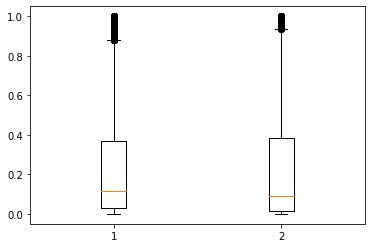

In [4]:
plt.boxplot([predictions_proba_a, predictions_proba_b]);

In [5]:
pd.Series(predictions_proba_a).describe()

count    32561.000000
mean         0.240557
std          0.274355
min          0.000154
25%          0.029669
50%          0.117442
75%          0.369043
max          1.000000
dtype: float64

In [6]:
pd.Series(predictions_proba_b).describe()

count    32561.000000
mean         0.240839
std          0.297715
min          0.000035
25%          0.015336
50%          0.091841
75%          0.383971
max          0.999540
dtype: float64

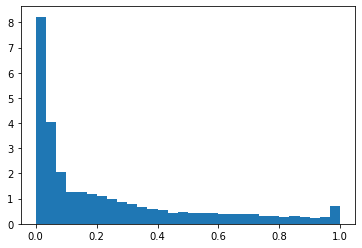

In [7]:
plt.hist(predictions_proba_a, density=True, bins=30);

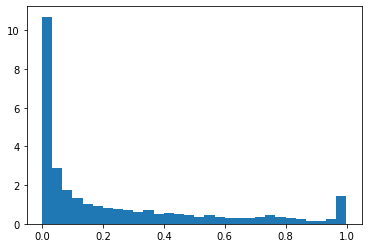

In [8]:
plt.hist(predictions_proba_b, density=True, bins=30);

## Check log odds estimates

In [11]:
predictions_logit_a = linear_model.predict_log_odds(X)
predictions_logit_b = tree_based_model.predict_log_odds(X)

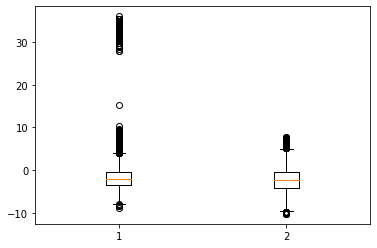

In [12]:
plt.boxplot([predictions_logit_a, predictions_logit_b]);

In [13]:
pd.Series(predictions_logit_a).describe()

count    32561.000000
mean        -1.726853
std          3.284088
min         -8.779025
25%         -3.487534
50%         -2.016880
75%         -0.536326
max         36.043653
dtype: float64

In [14]:
pd.Series(predictions_logit_b).describe()

count    32561.000000
mean        -2.235792
std          2.966678
min        -10.270814
25%         -4.162123
50%         -2.291360
75%         -0.472726
max          7.683243
dtype: float64

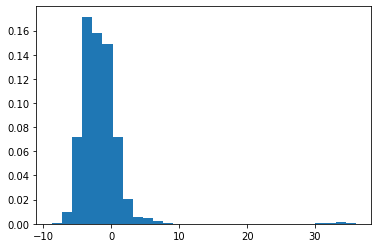

In [15]:
plt.hist(predictions_logit_a, density=True, bins=30);

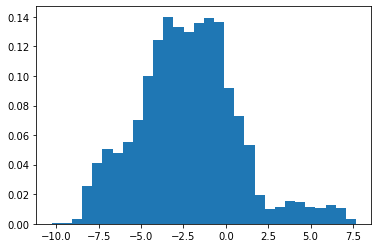

In [16]:
plt.hist(predictions_logit_b, density=True, bins=30);

# Check difference functions

## Probability difference

In [17]:
diff_proba = predictions_proba_b - predictions_proba_a

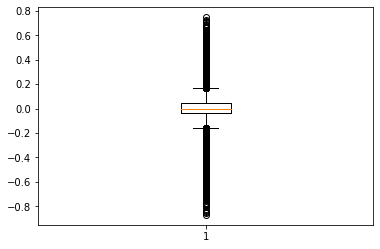

In [18]:
plt.boxplot(diff_proba);

In [19]:
pd.Series(diff_proba).describe()

count    32561.000000
mean         0.000281
std          0.122777
min         -0.870357
25%         -0.034862
50%         -0.001404
75%          0.046959
max          0.748700
dtype: float64

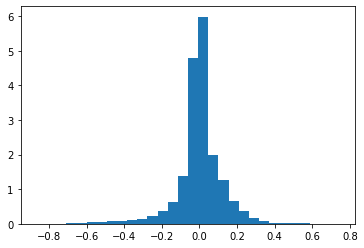

In [20]:
plt.hist(diff_proba, density=True, bins=30);

## Absolute probability difference

In [21]:
diff_proba_abs = abs(predictions_proba_b - predictions_proba_a)

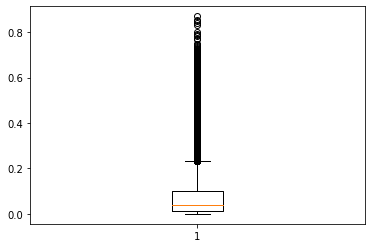

In [22]:
plt.boxplot(diff_proba_abs);

In [23]:
pd.Series(diff_proba_abs).describe()

count    3.256100e+04
mean     7.509660e-02
std      9.713164e-02
min      2.656267e-08
25%      1.231873e-02
50%      3.992046e-02
75%      1.002187e-01
max      8.703569e-01
dtype: float64

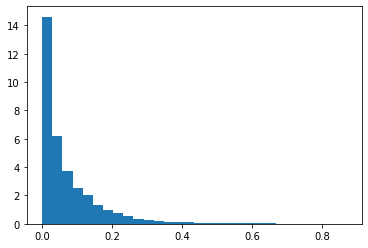

In [24]:
plt.hist(diff_proba_abs, density=True, bins=30);

## Difference of log of odds

In [25]:
diff_logit = predictions_logit_b - predictions_logit_a

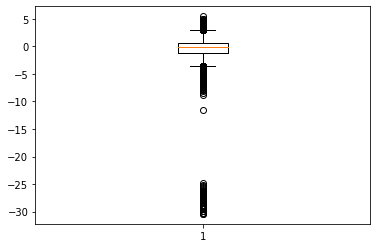

In [26]:
plt.boxplot(diff_logit);

In [27]:
pd.Series(diff_logit).describe()

count    32561.000000
mean        -0.508938
std          2.424743
min        -30.419872
25%         -1.110734
50%         -0.045999
75%          0.544772
max          5.474354
dtype: float64

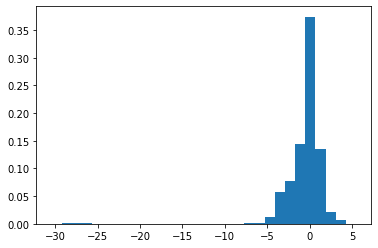

In [28]:
plt.hist(diff_logit, density=True, bins=30);

## Probability similarity

In [29]:
simil_proba = predictions_proba_a * predictions_proba_b

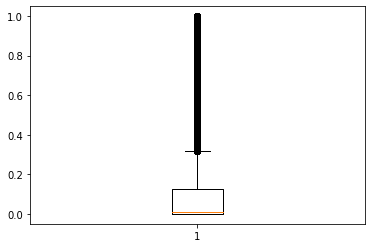

In [30]:
plt.boxplot(simil_proba);

In [31]:
pd.Series(simil_proba).describe()

count    3.256100e+04
mean     1.323487e-01
std      2.435934e-01
min      1.137133e-07
25%      4.041357e-04
50%      9.114070e-03
75%      1.277623e-01
max      9.992418e-01
dtype: float64

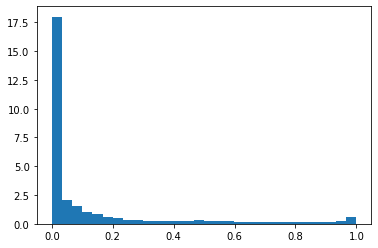

In [32]:
plt.hist(simil_proba, density=True, bins=30);

## Sum of log of odds
> In case you want to multiply those probabilities, they are often getting really small.If you add enough probabilities between > 0 and < 1, you will at some point run intofloating point precision issues. Instead you can use the sum of logarithms. https://www.reddit.com/r/MLQuestions/comments/5lzv9o/sklearn_why_predict_log_proba/

In [33]:
sum_logits = predictions_logit_a + predictions_logit_b

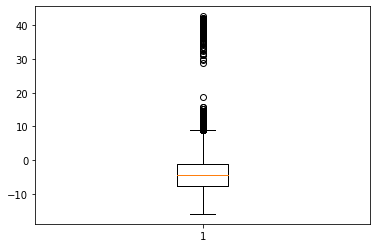

In [34]:
plt.boxplot(sum_logits);

In [35]:
pd.Series(sum_logits).describe()

count    32561.000000
mean        -3.962645
std          5.770048
min        -15.988641
25%         -7.758486
50%         -4.470016
75%         -1.104962
max         42.740353
dtype: float64

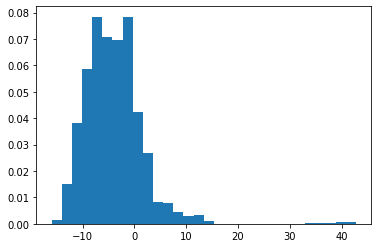

In [36]:
plt.hist(sum_logits, density=True, bins=30);

## Probability of predictions being different

In [37]:
proba_predictions__different = \
    (predictions_proba_b - predictions_proba_a * predictions_proba_b) + \
    (predictions_proba_a - predictions_proba_a * predictions_proba_b)

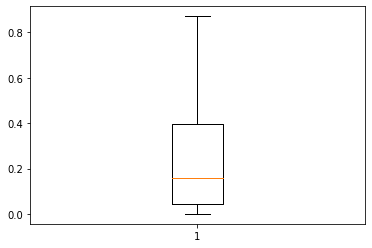

In [38]:
plt.boxplot(proba_predictions__different);

In [39]:
pd.Series(proba_predictions__different).describe()

count    32561.000000
mean         0.216698
std          0.184267
min          0.000757
25%          0.045301
50%          0.157127
75%          0.396814
max          0.870608
dtype: float64

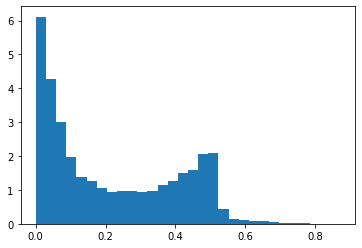

In [40]:
plt.hist(proba_predictions__different, density=True, bins=30);